This notebook will reproduce the background distribution plot in the NANOGrav 15-year GWB paper (Figure 3).

In [1]:
from __future__ import (absolute_import, division,
                        print_function, unicode_literals)

import numpy as np
import json
from scipy.stats import norm
from scipy.interpolate import interp1d
from matplotlib import ticker as mticker
import matplotlib.pyplot as plt
import matplotlib

%config InlineBackend.figure_format='retina'
matplotlib.rcParams.update(matplotlib.rcParamsDefault)

In [6]:
# load plotting parameters to match the style in the NANOGrav 15-year GWB paper
with open('../ng15_rcparams.json', 'rb') as f:
    plt.rcParams.update(json.load(f))
plt.rcParams['text.latex.preamble'] = (
    r'\usepackage{amsmath}'
    r'\usepackage{amsbsy}'
    r'\DeclareMathAlphabet{\mathcal}{OMS}{cmsy}{m}{n}'
)

def figsize2(scale):
    fig_width_pt = 513.17 #469.755                  # Get this from LaTeX using \the\textwidth
    inches_per_pt = 1.0/72.27                       # Convert pt to inch
    golden_mean = (np.sqrt(5.0)-1.0)/2.0            # Aesthetic ratio (you could change this)
    fig_width = fig_width_pt*inches_per_pt*scale    # width in inches
    fig_height = fig_width*golden_mean              # height in inches
    fig_size = [2*fig_width-0.6,fig_height]
    return fig_size

In [7]:
# load phase shift results
pshift_bfs = np.load('pshift_bfs.npy')
pshift_optstat = np.load('pshift_optstat.npy')

# load optimal statistic simulation results
sim_snr = np.loadtxt('snrs_m2a_simulations.txt')

# load analytical calculation of the optimal statistic background
gx2 = np.loadtxt('gx2_ng15yr_vg_median.txt')

# convert analytical background PDF to CDF
gx2_cdf = np.zeros(gx2.shape)
for i in range(gx2.shape[0]):
    gx2_cdf[i,0] = gx2[i,0]
    
    if i > 0:
        gx2_cdf[i,1] = gx2_cdf[i-1,1] + gx2[i,1]*(gx2[i,0] - gx2[i-1,0])

In [8]:
sigma2 = norm.sf(2, loc=0, scale=1)
sigma3 = norm.sf(3, loc=0, scale=1)
sigma4 = norm.sf(4, loc=0, scale=1)

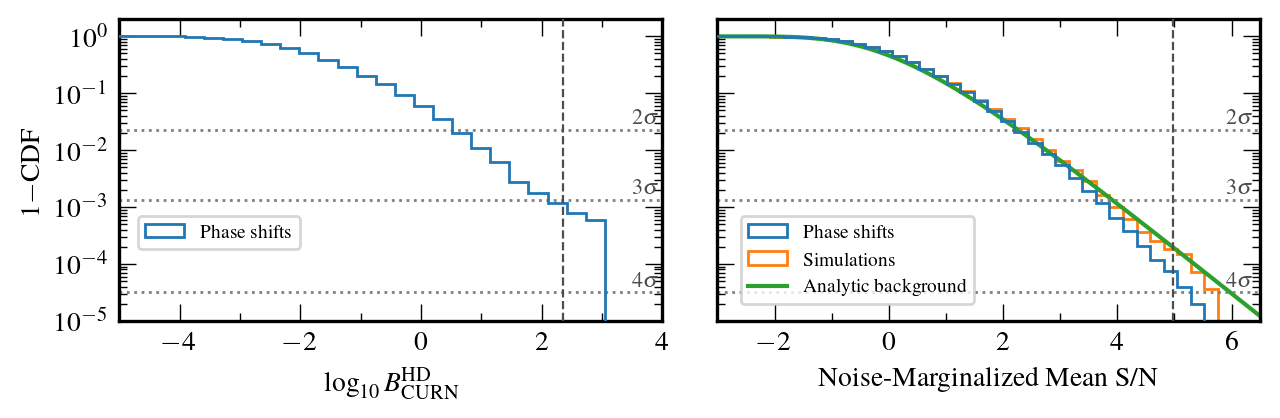

In [9]:
fig, axs = plt.subplots(1, 2, figsize=figsize2(0.5), sharey=True)

axs[0].hist(np.log10(pshift_bfs), histtype='step', bins=30, density=True, cumulative=-1, 
            range=(-5.5, 4), label='Phase shifts', zorder=9)

axs[0].axvline(np.log10(226), ls='--', color='0.3', lw=0.8, zorder=10)

axs[0].legend(bbox_to_anchor=(0.35, 0.38))
axs[0].set_yscale('log')
axs[0].set_xlim((-5,4))
axs[0].set_xlabel(r'$\log_{10} B^{\mathrm{HD}}_{\mathrm{CURN}}$')
axs[0].set_ylabel(r'$1 - $CDF')

axs[1].hist(pshift_optstat, histtype='step', bins=40, density=True, cumulative=-1, 
            label='Phase shifts', range=(-3.5, 6), zorder=9)
axs[1].axvline(4.983383592865897, color='0.3', ls='--', lw=0.8, zorder=10)

axs[1].hist(sim_snr, histtype='step', bins=40, range=(-3.5, 6), density=True, cumulative=-1, 
            label='Simulations')
axs[1].plot(gx2_cdf[:,0], 1-gx2_cdf[:,1], label='Analytic background')

axs[1].legend(bbox_to_anchor=(0.49, 0.38))
axs[1].set_yscale('log')

axs[1].set_xlim((-3,6.5))
axs[1].set_xlabel('Noise-Marginalized Mean S/N')

axs[0].set_ylim((1e-5,2))
axs[0].set_yticks([1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1])

for ax in axs:
    ax.tick_params(axis='y', which='both')
    
x_pos = [3.5, 5.9]

for i,ax in enumerate(axs):
    ax.text(x_pos[i], sigma2*1.3, r'2$\sigma$', color='0.3', fontsize=8);
    ax.axhline(sigma2, ls=':', lw=1, color='0.5')
    ax.text(x_pos[i], sigma3*1.3, r'3$\sigma$', color='0.3', fontsize=8);
    ax.axhline(sigma3, ls=':', lw=1, color='0.5')
    ax.text(x_pos[i], sigma4*1.3, r'4$\sigma$', color='0.3', fontsize=8);
    ax.axhline(sigma4, ls=':', lw=1, color='0.5')

    ax.xaxis.set_minor_locator(mticker.MultipleLocator(1))
    ax.yaxis.set_minor_locator(mticker.LogLocator(numticks=999, 
                                                  subs=(0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9)))

plt.tight_layout()
plt.show()

# plt.savefig('fap_plots_logscale_cdf_pshift.pdf')

Below we compute the p-values for the Bayes factor and optimal statistic S/N:

In [10]:
print('The p-value for the Bayes factor is {0:.2e}'.format(len(np.where(pshift_bfs > 226)[0])/len(pshift_bfs)))

The p-value for the Bayes factor is 7.85e-04


In [11]:
nshift = len(np.where(pshift_optstat > 4.983383592865897)[0])
print('The p-value for the optimal statistic S/N is:')
print('\t{0:.2e} (phase shifts)'.format(nshift/len(pshift_optstat)))
print('\t{0:.2e} (simulations)'.format(len(np.where(sim_snr > 4.983383592865897)[0])/len(sim_snr)))

func = interp1d(gx2_cdf[:,0], 1-gx2_cdf[:,1])
print('\t{0:.2e} (GX2 distribution)'.format(func(4.983383592865897)))

The p-value for the optimal statistic S/N is:
	4.75e-05 (phase shifts)
	1.84e-04 (simulations)
	1.93e-04 (GX2 distribution)
